# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [67]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

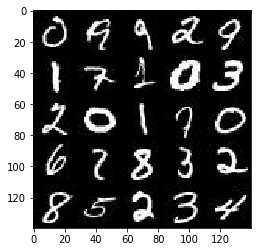

In [68]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

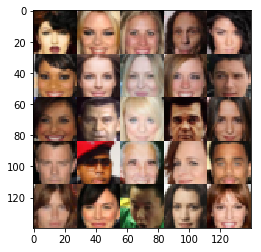

In [69]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [70]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [71]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32,(None,image_width, image_height, 
                                             image_channels),name='real_inputs')
    z_inputs = tf.placeholder(tf.float32,(None,z_dim),name='z_inputs')
    lr = tf.placeholder(tf.float32,name='lr')

    return real_inputs, z_inputs, lr



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [72]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
         
    
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(0.2 * x1, x1)
    
    
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
       
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        
        
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits 




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [73]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator',reuse = not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
       
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
       
        
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        
        
        
        out = tf.tanh(logits)
        
  
    return out 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [74]:
def model_loss(input_real, input_z, out_channel_dim,alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss
    
   
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [75]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [76]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [77]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 50, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.6657... Generator Loss: 0.1659
Epoch 1/2... Discriminator Loss: 1.0125... Generator Loss: 2.5326
Epoch 1/2... Discriminator Loss: 1.4291... Generator Loss: 0.6070
Epoch 1/2... Discriminator Loss: 1.7957... Generator Loss: 0.3631
Epoch 1/2... Discriminator Loss: 1.7253... Generator Loss: 1.0910
Epoch 1/2... Discriminator Loss: 1.5276... Generator Loss: 0.6978
Epoch 1/2... Discriminator Loss: 1.5317... Generator Loss: 0.6525
Epoch 1/2... Discriminator Loss: 1.4827... Generator Loss: 1.0638
Epoch 1/2... Discriminator Loss: 1.3306... Generator Loss: 0.6893
Epoch 1/2... Discriminator Loss: 1.4211... Generator Loss: 0.5445


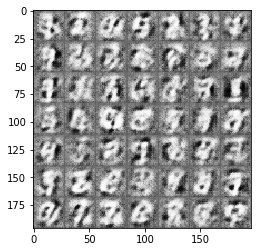

Epoch 1/2... Discriminator Loss: 1.5272... Generator Loss: 0.4866
Epoch 1/2... Discriminator Loss: 1.6981... Generator Loss: 0.3533
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 1.4082
Epoch 1/2... Discriminator Loss: 1.4312... Generator Loss: 0.5641
Epoch 1/2... Discriminator Loss: 1.1794... Generator Loss: 0.8162
Epoch 1/2... Discriminator Loss: 1.3301... Generator Loss: 0.7833
Epoch 1/2... Discriminator Loss: 1.0953... Generator Loss: 0.8971
Epoch 1/2... Discriminator Loss: 1.3199... Generator Loss: 0.5891
Epoch 1/2... Discriminator Loss: 1.8486... Generator Loss: 3.1892
Epoch 1/2... Discriminator Loss: 0.9973... Generator Loss: 1.2399


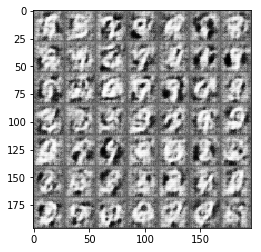

Epoch 1/2... Discriminator Loss: 1.0370... Generator Loss: 1.0605
Epoch 1/2... Discriminator Loss: 1.2374... Generator Loss: 2.0090
Epoch 1/2... Discriminator Loss: 1.1869... Generator Loss: 2.0650
Epoch 1/2... Discriminator Loss: 1.5909... Generator Loss: 0.4280
Epoch 1/2... Discriminator Loss: 0.9410... Generator Loss: 1.3433
Epoch 1/2... Discriminator Loss: 1.8154... Generator Loss: 0.3026
Epoch 1/2... Discriminator Loss: 1.4670... Generator Loss: 0.5027
Epoch 1/2... Discriminator Loss: 1.4928... Generator Loss: 0.4767
Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 2.1702
Epoch 1/2... Discriminator Loss: 1.2981... Generator Loss: 0.6516


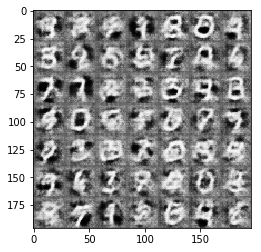

Epoch 1/2... Discriminator Loss: 1.1864... Generator Loss: 0.9576
Epoch 1/2... Discriminator Loss: 1.3108... Generator Loss: 0.5562
Epoch 1/2... Discriminator Loss: 1.5018... Generator Loss: 1.7190
Epoch 1/2... Discriminator Loss: 1.6335... Generator Loss: 0.4134
Epoch 1/2... Discriminator Loss: 1.0510... Generator Loss: 0.8816
Epoch 1/2... Discriminator Loss: 1.7585... Generator Loss: 0.3539
Epoch 1/2... Discriminator Loss: 1.2509... Generator Loss: 0.6890
Epoch 1/2... Discriminator Loss: 1.0828... Generator Loss: 1.1786
Epoch 1/2... Discriminator Loss: 1.5119... Generator Loss: 0.4568
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 0.8602


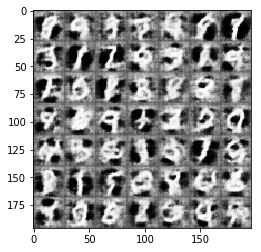

Epoch 1/2... Discriminator Loss: 1.1344... Generator Loss: 0.7497
Epoch 1/2... Discriminator Loss: 1.1660... Generator Loss: 0.8927
Epoch 1/2... Discriminator Loss: 1.1059... Generator Loss: 1.1280
Epoch 1/2... Discriminator Loss: 1.3791... Generator Loss: 0.5516
Epoch 1/2... Discriminator Loss: 1.1812... Generator Loss: 0.7591
Epoch 1/2... Discriminator Loss: 1.6264... Generator Loss: 0.3824
Epoch 1/2... Discriminator Loss: 1.1632... Generator Loss: 1.1873
Epoch 1/2... Discriminator Loss: 1.1445... Generator Loss: 1.3896
Epoch 1/2... Discriminator Loss: 1.1538... Generator Loss: 1.1722
Epoch 1/2... Discriminator Loss: 1.1553... Generator Loss: 1.1262


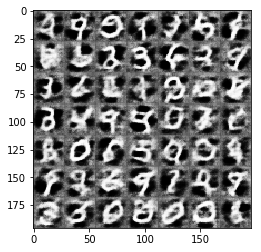

Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 0.6243
Epoch 1/2... Discriminator Loss: 1.3752... Generator Loss: 1.8112
Epoch 1/2... Discriminator Loss: 1.2058... Generator Loss: 0.7968
Epoch 1/2... Discriminator Loss: 1.2195... Generator Loss: 0.6866
Epoch 1/2... Discriminator Loss: 1.1374... Generator Loss: 1.6314
Epoch 1/2... Discriminator Loss: 1.1424... Generator Loss: 0.9533
Epoch 1/2... Discriminator Loss: 1.1255... Generator Loss: 1.1803
Epoch 1/2... Discriminator Loss: 1.1100... Generator Loss: 1.1436
Epoch 1/2... Discriminator Loss: 1.4840... Generator Loss: 0.4890
Epoch 1/2... Discriminator Loss: 1.2708... Generator Loss: 1.6985


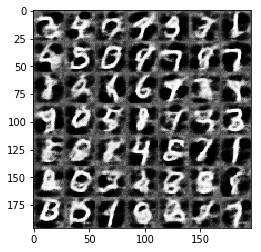

Epoch 1/2... Discriminator Loss: 1.5923... Generator Loss: 0.4083
Epoch 1/2... Discriminator Loss: 1.4405... Generator Loss: 0.5219
Epoch 1/2... Discriminator Loss: 1.1448... Generator Loss: 1.3174
Epoch 1/2... Discriminator Loss: 1.1982... Generator Loss: 1.5875
Epoch 1/2... Discriminator Loss: 1.1101... Generator Loss: 1.0028
Epoch 1/2... Discriminator Loss: 1.4782... Generator Loss: 2.3926
Epoch 1/2... Discriminator Loss: 1.2744... Generator Loss: 0.6400
Epoch 1/2... Discriminator Loss: 1.3634... Generator Loss: 0.5633
Epoch 1/2... Discriminator Loss: 0.9817... Generator Loss: 1.4692
Epoch 1/2... Discriminator Loss: 1.1153... Generator Loss: 1.4678


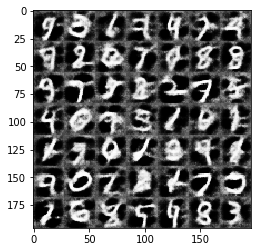

Epoch 1/2... Discriminator Loss: 1.2501... Generator Loss: 1.9658
Epoch 1/2... Discriminator Loss: 0.9852... Generator Loss: 1.0719
Epoch 1/2... Discriminator Loss: 1.0768... Generator Loss: 0.8762
Epoch 1/2... Discriminator Loss: 1.0985... Generator Loss: 1.4870
Epoch 1/2... Discriminator Loss: 1.3571... Generator Loss: 0.5439
Epoch 1/2... Discriminator Loss: 1.2761... Generator Loss: 0.5771
Epoch 1/2... Discriminator Loss: 1.3371... Generator Loss: 0.6101
Epoch 1/2... Discriminator Loss: 1.0345... Generator Loss: 1.1734
Epoch 1/2... Discriminator Loss: 0.9514... Generator Loss: 1.4942
Epoch 1/2... Discriminator Loss: 0.9229... Generator Loss: 1.3915


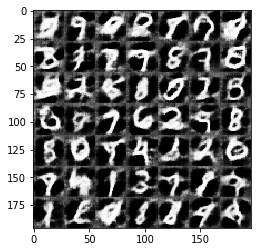

Epoch 1/2... Discriminator Loss: 0.9679... Generator Loss: 1.0381
Epoch 1/2... Discriminator Loss: 1.1873... Generator Loss: 0.7766
Epoch 1/2... Discriminator Loss: 1.0555... Generator Loss: 0.8253
Epoch 1/2... Discriminator Loss: 1.2567... Generator Loss: 0.6499
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 1.0157
Epoch 1/2... Discriminator Loss: 2.0579... Generator Loss: 0.3249
Epoch 1/2... Discriminator Loss: 1.1521... Generator Loss: 0.8067
Epoch 1/2... Discriminator Loss: 1.1149... Generator Loss: 0.8788
Epoch 1/2... Discriminator Loss: 1.0494... Generator Loss: 1.0135
Epoch 1/2... Discriminator Loss: 1.0399... Generator Loss: 1.4774


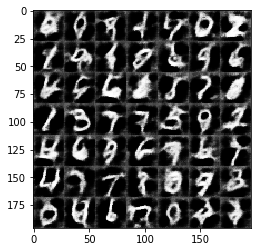

Epoch 1/2... Discriminator Loss: 0.9766... Generator Loss: 1.1145
Epoch 1/2... Discriminator Loss: 1.0160... Generator Loss: 1.4496
Epoch 1/2... Discriminator Loss: 1.0064... Generator Loss: 1.0592
Epoch 2/2... Discriminator Loss: 0.9753... Generator Loss: 1.0047
Epoch 2/2... Discriminator Loss: 2.0489... Generator Loss: 0.2619
Epoch 2/2... Discriminator Loss: 1.1242... Generator Loss: 0.7421
Epoch 2/2... Discriminator Loss: 1.1314... Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 0.9848... Generator Loss: 1.2284
Epoch 2/2... Discriminator Loss: 0.9152... Generator Loss: 1.1527
Epoch 2/2... Discriminator Loss: 1.3503... Generator Loss: 0.5283


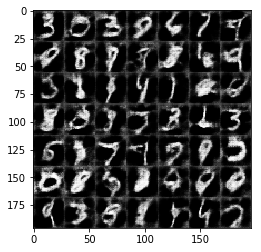

Epoch 2/2... Discriminator Loss: 0.8873... Generator Loss: 1.0452
Epoch 2/2... Discriminator Loss: 1.3453... Generator Loss: 0.5741
Epoch 2/2... Discriminator Loss: 1.2009... Generator Loss: 0.7067
Epoch 2/2... Discriminator Loss: 0.9411... Generator Loss: 1.3040
Epoch 2/2... Discriminator Loss: 3.2729... Generator Loss: 0.1014
Epoch 2/2... Discriminator Loss: 1.0725... Generator Loss: 1.0639
Epoch 2/2... Discriminator Loss: 1.0963... Generator Loss: 1.0218
Epoch 2/2... Discriminator Loss: 0.9810... Generator Loss: 1.3567
Epoch 2/2... Discriminator Loss: 1.3490... Generator Loss: 2.5650
Epoch 2/2... Discriminator Loss: 1.1573... Generator Loss: 0.7320


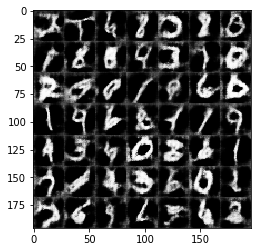

Epoch 2/2... Discriminator Loss: 1.0188... Generator Loss: 0.9458
Epoch 2/2... Discriminator Loss: 1.0130... Generator Loss: 1.5358
Epoch 2/2... Discriminator Loss: 1.0261... Generator Loss: 0.8529
Epoch 2/2... Discriminator Loss: 1.4219... Generator Loss: 0.4974
Epoch 2/2... Discriminator Loss: 1.3708... Generator Loss: 0.5545
Epoch 2/2... Discriminator Loss: 1.2075... Generator Loss: 0.7002
Epoch 2/2... Discriminator Loss: 1.1199... Generator Loss: 1.8396
Epoch 2/2... Discriminator Loss: 1.3289... Generator Loss: 0.5756
Epoch 2/2... Discriminator Loss: 1.3204... Generator Loss: 0.6151
Epoch 2/2... Discriminator Loss: 0.8779... Generator Loss: 1.3361


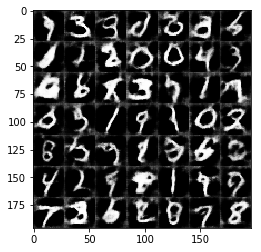

Epoch 2/2... Discriminator Loss: 1.6180... Generator Loss: 0.4462
Epoch 2/2... Discriminator Loss: 1.3682... Generator Loss: 0.5411
Epoch 2/2... Discriminator Loss: 1.3201... Generator Loss: 0.6301
Epoch 2/2... Discriminator Loss: 0.9847... Generator Loss: 0.9419
Epoch 2/2... Discriminator Loss: 1.0018... Generator Loss: 1.3204
Epoch 2/2... Discriminator Loss: 1.0719... Generator Loss: 1.0269
Epoch 2/2... Discriminator Loss: 0.9413... Generator Loss: 1.5413
Epoch 2/2... Discriminator Loss: 1.0140... Generator Loss: 0.8694
Epoch 2/2... Discriminator Loss: 1.0680... Generator Loss: 0.8549
Epoch 2/2... Discriminator Loss: 1.0661... Generator Loss: 1.6585


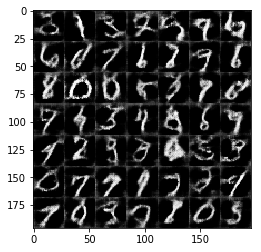

Epoch 2/2... Discriminator Loss: 0.9522... Generator Loss: 1.4882
Epoch 2/2... Discriminator Loss: 1.1671... Generator Loss: 0.8248
Epoch 2/2... Discriminator Loss: 0.9964... Generator Loss: 1.0533
Epoch 2/2... Discriminator Loss: 1.0474... Generator Loss: 1.0372
Epoch 2/2... Discriminator Loss: 0.9563... Generator Loss: 1.1389
Epoch 2/2... Discriminator Loss: 0.9427... Generator Loss: 1.2292
Epoch 2/2... Discriminator Loss: 1.0764... Generator Loss: 1.2983
Epoch 2/2... Discriminator Loss: 0.9456... Generator Loss: 1.0614
Epoch 2/2... Discriminator Loss: 1.1434... Generator Loss: 1.2764
Epoch 2/2... Discriminator Loss: 0.9380... Generator Loss: 1.0820


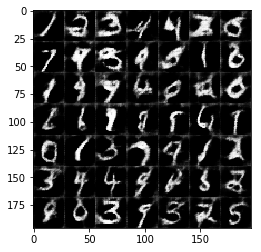

Epoch 2/2... Discriminator Loss: 1.1155... Generator Loss: 0.7514
Epoch 2/2... Discriminator Loss: 1.0355... Generator Loss: 1.6847
Epoch 2/2... Discriminator Loss: 0.9232... Generator Loss: 1.7445
Epoch 2/2... Discriminator Loss: 1.0245... Generator Loss: 1.4623
Epoch 2/2... Discriminator Loss: 1.6750... Generator Loss: 0.3992
Epoch 2/2... Discriminator Loss: 0.8354... Generator Loss: 1.3005
Epoch 2/2... Discriminator Loss: 1.1705... Generator Loss: 2.5052
Epoch 2/2... Discriminator Loss: 1.0480... Generator Loss: 0.9942
Epoch 2/2... Discriminator Loss: 0.9722... Generator Loss: 1.2842
Epoch 2/2... Discriminator Loss: 1.0752... Generator Loss: 1.3375


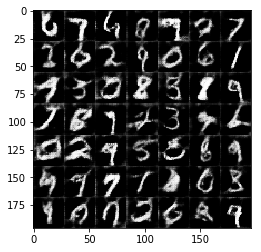

Epoch 2/2... Discriminator Loss: 1.2127... Generator Loss: 0.7740
Epoch 2/2... Discriminator Loss: 0.8675... Generator Loss: 1.2829
Epoch 2/2... Discriminator Loss: 1.4084... Generator Loss: 2.3624
Epoch 2/2... Discriminator Loss: 1.1258... Generator Loss: 1.7456
Epoch 2/2... Discriminator Loss: 0.9962... Generator Loss: 0.9090
Epoch 2/2... Discriminator Loss: 0.9029... Generator Loss: 1.2001
Epoch 2/2... Discriminator Loss: 0.8226... Generator Loss: 1.5542
Epoch 2/2... Discriminator Loss: 0.8518... Generator Loss: 1.1635
Epoch 2/2... Discriminator Loss: 2.4243... Generator Loss: 3.9011
Epoch 2/2... Discriminator Loss: 0.9733... Generator Loss: 1.0777


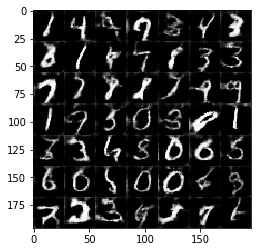

Epoch 2/2... Discriminator Loss: 1.0881... Generator Loss: 0.9276
Epoch 2/2... Discriminator Loss: 0.8040... Generator Loss: 1.6793
Epoch 2/2... Discriminator Loss: 0.8619... Generator Loss: 1.8672
Epoch 2/2... Discriminator Loss: 0.7935... Generator Loss: 1.5652
Epoch 2/2... Discriminator Loss: 1.1504... Generator Loss: 0.7216
Epoch 2/2... Discriminator Loss: 1.5927... Generator Loss: 2.6574
Epoch 2/2... Discriminator Loss: 1.2433... Generator Loss: 0.6766
Epoch 2/2... Discriminator Loss: 0.8459... Generator Loss: 2.1506
Epoch 2/2... Discriminator Loss: 1.0437... Generator Loss: 1.9179
Epoch 2/2... Discriminator Loss: 1.0536... Generator Loss: 0.8832


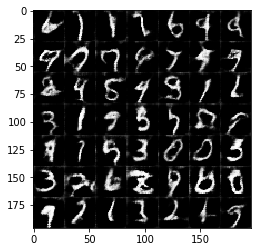

Epoch 2/2... Discriminator Loss: 0.8470... Generator Loss: 1.1989
Epoch 2/2... Discriminator Loss: 1.0763... Generator Loss: 0.8409
Epoch 2/2... Discriminator Loss: 1.0769... Generator Loss: 1.1453
Epoch 2/2... Discriminator Loss: 0.9924... Generator Loss: 2.3485
Epoch 2/2... Discriminator Loss: 0.8995... Generator Loss: 1.7126
Epoch 2/2... Discriminator Loss: 1.1555... Generator Loss: 0.8157
Epoch 2/2... Discriminator Loss: 0.8151... Generator Loss: 1.4763
Epoch 2/2... Discriminator Loss: 0.9984... Generator Loss: 1.0078
Epoch 2/2... Discriminator Loss: 1.2426... Generator Loss: 2.9700
Epoch 2/2... Discriminator Loss: 1.1977... Generator Loss: 0.7292


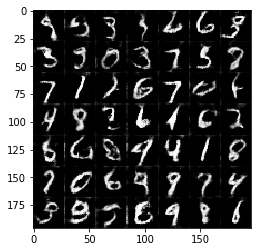

Epoch 2/2... Discriminator Loss: 1.0072... Generator Loss: 2.1514
Epoch 2/2... Discriminator Loss: 0.9045... Generator Loss: 1.3721
Epoch 2/2... Discriminator Loss: 1.1423... Generator Loss: 0.6948
Epoch 2/2... Discriminator Loss: 0.9907... Generator Loss: 1.9853
Epoch 2/2... Discriminator Loss: 0.9552... Generator Loss: 2.0256
Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 2.3058
Epoch 2/2... Discriminator Loss: 1.0004... Generator Loss: 1.0766


In [78]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 1.0890
Epoch 1/1... Discriminator Loss: 2.5210... Generator Loss: 7.7487
Epoch 1/1... Discriminator Loss: 0.9321... Generator Loss: 2.9639
Epoch 1/1... Discriminator Loss: 3.3852... Generator Loss: 8.3780
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 1.5113
Epoch 1/1... Discriminator Loss: 0.9889... Generator Loss: 1.1504
Epoch 1/1... Discriminator Loss: 0.5772... Generator Loss: 2.4030
Epoch 1/1... Discriminator Loss: 1.2161... Generator Loss: 5.0393
Epoch 1/1... Discriminator Loss: 0.8729... Generator Loss: 1.3327
Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 4.6986


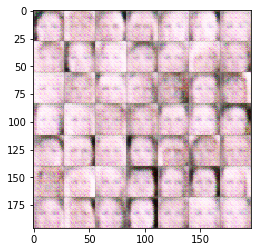

Epoch 1/1... Discriminator Loss: 1.6188... Generator Loss: 5.8119
Epoch 1/1... Discriminator Loss: 0.8879... Generator Loss: 1.2044
Epoch 1/1... Discriminator Loss: 1.7104... Generator Loss: 0.4328
Epoch 1/1... Discriminator Loss: 0.7696... Generator Loss: 5.4452
Epoch 1/1... Discriminator Loss: 0.5680... Generator Loss: 3.5030
Epoch 1/1... Discriminator Loss: 0.7450... Generator Loss: 1.4229
Epoch 1/1... Discriminator Loss: 1.2464... Generator Loss: 3.3016
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.6313
Epoch 1/1... Discriminator Loss: 1.1771... Generator Loss: 0.6942
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.5451


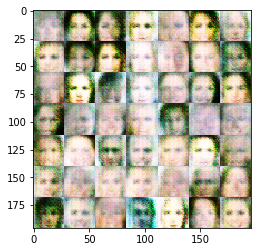

Epoch 1/1... Discriminator Loss: 0.6234... Generator Loss: 3.6389
Epoch 1/1... Discriminator Loss: 1.0953... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.8780
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.9467
Epoch 1/1... Discriminator Loss: 1.5943... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.6452... Generator Loss: 0.4413
Epoch 1/1... Discriminator Loss: 1.5642... Generator Loss: 0.4271
Epoch 1/1... Discriminator Loss: 0.7119... Generator Loss: 1.3500
Epoch 1/1... Discriminator Loss: 3.7044... Generator Loss: 0.0496
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.7004


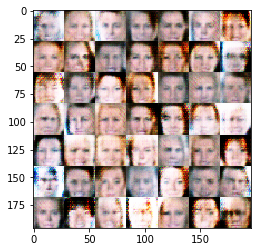

Epoch 1/1... Discriminator Loss: 1.6713... Generator Loss: 0.5574
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 0.7212
Epoch 1/1... Discriminator Loss: 4.8491... Generator Loss: 4.7235
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.5946
Epoch 1/1... Discriminator Loss: 0.8398... Generator Loss: 1.1826
Epoch 1/1... Discriminator Loss: 0.8649... Generator Loss: 1.3617
Epoch 1/1... Discriminator Loss: 1.3665... Generator Loss: 1.2107
Epoch 1/1... Discriminator Loss: 1.4740... Generator Loss: 1.7861
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.3147
Epoch 1/1... Discriminator Loss: 1.2112... Generator Loss: 0.7046


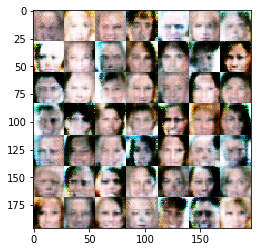

Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 1.2229
Epoch 1/1... Discriminator Loss: 1.0253... Generator Loss: 2.0271
Epoch 1/1... Discriminator Loss: 1.6031... Generator Loss: 0.5317
Epoch 1/1... Discriminator Loss: 1.0143... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 0.6091... Generator Loss: 3.1054
Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.0806... Generator Loss: 1.3316
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.6731
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 2.2697
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 1.0315


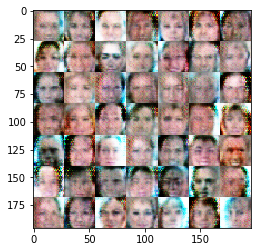

Epoch 1/1... Discriminator Loss: 1.6438... Generator Loss: 0.3879
Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.5562
Epoch 1/1... Discriminator Loss: 1.0365... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 1.0959... Generator Loss: 1.3107
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.4539
Epoch 1/1... Discriminator Loss: 1.0233... Generator Loss: 1.6017
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.8201
Epoch 1/1... Discriminator Loss: 3.0875... Generator Loss: 0.0903
Epoch 1/1... Discriminator Loss: 0.6087... Generator Loss: 1.6966
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 0.8890


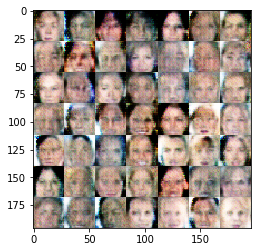

Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 0.7689
Epoch 1/1... Discriminator Loss: 0.8914... Generator Loss: 2.0205
Epoch 1/1... Discriminator Loss: 0.9560... Generator Loss: 0.9463
Epoch 1/1... Discriminator Loss: 2.7245... Generator Loss: 2.6641
Epoch 1/1... Discriminator Loss: 0.9666... Generator Loss: 1.0096
Epoch 1/1... Discriminator Loss: 0.9948... Generator Loss: 1.1413
Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.8965
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 0.9177
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 2.0070
Epoch 1/1... Discriminator Loss: 0.6289... Generator Loss: 2.3055


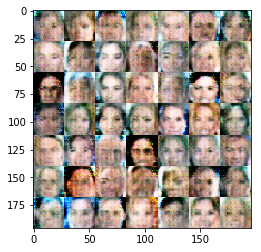

Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 1.6173
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 1.1371
Epoch 1/1... Discriminator Loss: 0.8993... Generator Loss: 1.1623
Epoch 1/1... Discriminator Loss: 1.9712... Generator Loss: 4.6405
Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 0.7863... Generator Loss: 2.1694
Epoch 1/1... Discriminator Loss: 0.9807... Generator Loss: 1.6854
Epoch 1/1... Discriminator Loss: 0.7724... Generator Loss: 1.4658
Epoch 1/1... Discriminator Loss: 1.2315... Generator Loss: 0.5994
Epoch 1/1... Discriminator Loss: 0.6029... Generator Loss: 2.1935


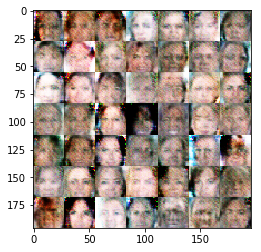

Epoch 1/1... Discriminator Loss: 0.8482... Generator Loss: 1.0630
Epoch 1/1... Discriminator Loss: 1.6532... Generator Loss: 2.0231
Epoch 1/1... Discriminator Loss: 0.9619... Generator Loss: 0.8814
Epoch 1/1... Discriminator Loss: 0.9056... Generator Loss: 1.1854
Epoch 1/1... Discriminator Loss: 1.1826... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 0.9036... Generator Loss: 1.6926
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 0.8081
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 1.5602
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 2.7310
Epoch 1/1... Discriminator Loss: 0.6715... Generator Loss: 2.3061


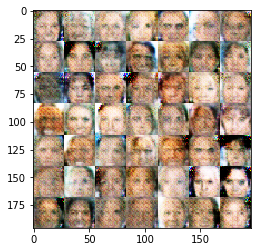

Epoch 1/1... Discriminator Loss: 1.0521... Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 2.3878
Epoch 1/1... Discriminator Loss: 1.5453... Generator Loss: 0.3985
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 1.5176
Epoch 1/1... Discriminator Loss: 1.5855... Generator Loss: 0.3874
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 1.3106
Epoch 1/1... Discriminator Loss: 1.2215... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.0835... Generator Loss: 0.8926


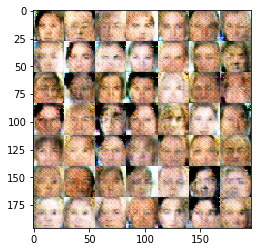

Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 0.9939
Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 1.3319
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 1.3527
Epoch 1/1... Discriminator Loss: 0.6105... Generator Loss: 1.9478
Epoch 1/1... Discriminator Loss: 0.7033... Generator Loss: 1.3208
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 0.7959... Generator Loss: 1.2671
Epoch 1/1... Discriminator Loss: 0.5570... Generator Loss: 3.0229
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 1.8914
Epoch 1/1... Discriminator Loss: 0.5923... Generator Loss: 2.0357


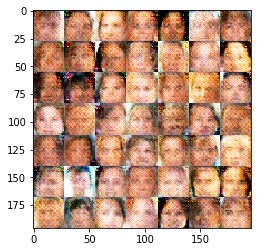

Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 0.9786
Epoch 1/1... Discriminator Loss: 1.0368... Generator Loss: 1.4451
Epoch 1/1... Discriminator Loss: 1.5806... Generator Loss: 0.4043
Epoch 1/1... Discriminator Loss: 0.9829... Generator Loss: 0.9327
Epoch 1/1... Discriminator Loss: 1.1882... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 0.8372... Generator Loss: 1.6525
Epoch 1/1... Discriminator Loss: 1.1389... Generator Loss: 1.9909
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.1117... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 2.5437... Generator Loss: 2.8732


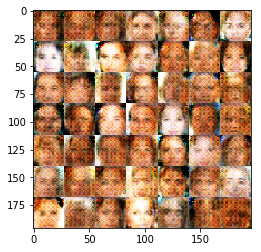

Epoch 1/1... Discriminator Loss: 0.8784... Generator Loss: 2.5149
Epoch 1/1... Discriminator Loss: 0.7491... Generator Loss: 2.8910
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 1.8582
Epoch 1/1... Discriminator Loss: 0.8536... Generator Loss: 4.5329
Epoch 1/1... Discriminator Loss: 0.7080... Generator Loss: 1.3386
Epoch 1/1... Discriminator Loss: 0.9113... Generator Loss: 1.3005
Epoch 1/1... Discriminator Loss: 1.4168... Generator Loss: 0.5007
Epoch 1/1... Discriminator Loss: 0.6387... Generator Loss: 2.4411
Epoch 1/1... Discriminator Loss: 0.9073... Generator Loss: 1.6980
Epoch 1/1... Discriminator Loss: 0.7207... Generator Loss: 1.3377


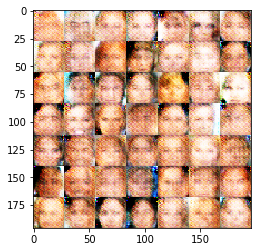

Epoch 1/1... Discriminator Loss: 0.4575... Generator Loss: 2.9645


KeyboardInterrupt: 

In [80]:
batch_size = 128
z_dim = 100
learning_rate = 0.0006
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.